In [1]:
import random
import pandas as pd

def generar_red(num_nodos=10, densidad=0.3, distancia_min=1, distancia_max=100, guardar_csv=True):
    """
    Genera un dataset sintético de una red con nodos y arcos.
    
    Args:
        num_nodos (int): Número de nodos en la red.
        densidad (float): Probabilidad de que exista un arco entre dos nodos (0 a 1).
        distancia_min (int): Distancia mínima entre nodos.
        distancia_max (int): Distancia máxima entre nodos.
        guardar_csv (bool): Si se guarda el dataset en un archivo CSV.
    
    Returns:
        pd.DataFrame: DataFrame con las conexiones entre nodos y sus costos.
    """
    # Lista de nodos
    nodos = list(range(num_nodos))
    
    # Lista para almacenar los arcos
    arcos = []
    
    # Generar arcos con probabilidades según la densidad
    for origen in nodos:
        for destino in nodos:
            if origen != destino and random.random() < densidad:
                # Generar un costo aleatorio para el arco
                costo = random.randint(distancia_min, distancia_max)
                arcos.append((origen, destino, costo))
    
    # Crear un DataFrame para organizar los datos
    df = pd.DataFrame(arcos, columns=['origen', 'destino', 'costo'])
    
    # Guardar en CSV si es necesario
    if guardar_csv:
        df.to_csv('../data/synthetic/synthetic_network.csv', index=False)
        print("Dataset guardado")
    
    return df



In [2]:
import networkx as nx
import matplotlib.pyplot as plt
def visualize_graph(df):
    """
    Visualiza una red representada en un DataFrame como un grafo.
    
    El grafo se dibuja utilizando un layout automático para mejorar la visualización.
    Los nodos se dibujan como rectángulos azules, los arcos se dibujan como líneas negras y los
    pesos de los arcos se dibujan como etiquetas rojas.
    
    Args:
        df (pd.DataFrame): DataFrame con columnas ['origen', 'destino', 'costo'].
    """
    # Verificar que df no sea None ni tenga filas vacías
    if df is None or df.empty:
        raise ValueError("El DataFrame no puede ser None ni estar vacío")
    
    # Verificar que el DataFrame tenga las columnas necesarias
    for col in ['origen', 'destino', 'costo']:
        if col not in df.columns:
            raise ValueError(f"El DataFrame debe tener la columna '{col}'")
    
    # Verificar que no haya filas con valores nulos
    if df.isnull().any().any():
        raise ValueError("El DataFrame no puede tener valores nulos")
    
    # Crear un grafo dirigido
    G = nx.DiGraph()
    
    # Añadir arcos y sus costos
    G.add_weighted_edges_from(df.values.tolist())
    
    # Obtener las posiciones de los nodos utilizando un layout
    # El layout 'spring' es una buena opción para redes con un número moderado de nodos
    pos = nx.spring_layout(G)
    
    # Dibujar nodos y arcos
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
    
    # Extraer pesos para etiquetar los arcos
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')
    
    # Mostrar el grafo
    plt.title("Red")
    plt.show()
        

Dataset guardado


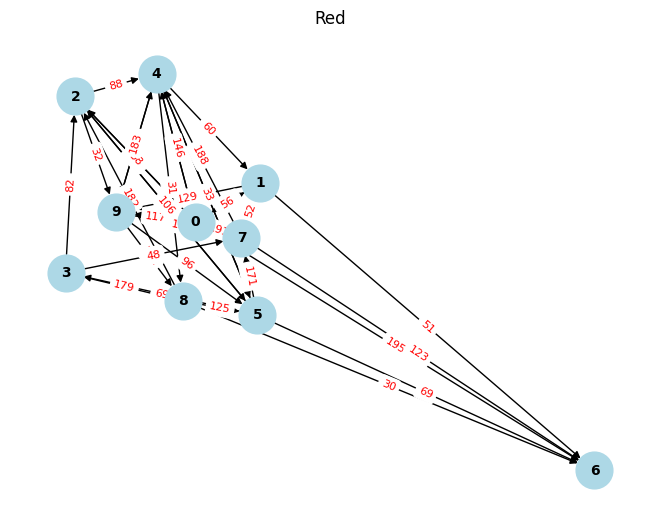

In [3]:
import random
# Generar dataset de ejemplo
dataset = generar_red(num_nodos=10, densidad=0.5, distancia_min=10, distancia_max=200, guardar_csv=True)

# Visualizar la red
visualize_graph(dataset)